In [1]:
from astropy.io import fits
from astropy.table import Table
hdul = fits.open()
data_tbl = Table(hdul[1].data)
spiders_df = data_tbl.to_pandas()
del(hdul)
del(data_tbl)
spiders_df.head()
spiders_BLAGN_df = spiders_df[ (spiders_df['CLASS_BEST'] == 'BLAGN ') | (spiders_df['CLASS_BEST'] == 'QSO   ')].copy()
del(spiders_df)
print(spiders_BLAGN_df.shape)
spiders_BLAGN_df.head()

(8302, 170)


,xray_detection,name,RA,DEC,ExpTime,ExiML_2RXS,DETML_XMMSL,f_2RXS,errf_2RXS,fden_2RXS,...,logBHMVP_hb,errlogBHMVP_hb,logBHMMD_hb,errlogBHMMD_hb,logBHMA_hb,errlogBHMA_hb,l_edd1,l_edd2,edd_ratio1,edd_ratio2
0,2RXS,2RXS J131703.4-021538,199.26434,-2.26066,273.859985,161.0,-99.0,8.035261e-12,7.752275e-13,2.811901e-30,...,6.778126,0.082026,6.288811,0.082846,6.717432,0.082175,NaN,7.799543e+44,NaN,0.006164
1,2RXS,2RXS J130358.4+534748,195.99369,53.79679,505.869995,273.0,-99.0,8.729714e-13,3.046346e-13,3.318945e-31,...,7.750659,0.060184,7.374837,0.060549,7.710600,0.060250,NaN,7.321536e+45,NaN,0.007065
2,2RXS,2RXS J160951.4+490216,242.46435,49.03793,535.039978,266.0,-99.0,1.409289e-12,3.086196e-13,5.069907e-31,...,6.893677,0.096619,6.542989,0.096997,6.858188,0.096688,NaN,1.017701e+45,NaN,0.086011
3,2RXS,2RXS J081517.7+460431,123.82380,46.07529,463.630005,61.0,-99.0,4.602566e-12,6.818868e-13,1.625549e-30,...,7.158066,0.110853,6.823838,0.111148,7.125570,0.110907,NaN,1.870724e+45,NaN,0.066039
4,2RXS,2RXS J160519.8+520726,241.33253,52.12398,547.679993,95.0,-99.0,8.669619e-13,2.706654e-13,3.243396e-31,...,7.229066,0.078857,6.829267,0.079705,7.184648,0.079011,NaN,2.202975e+45,NaN,0.014213


In [1]:
%matplotlib notebook

In [2]:
import inspec
path_specs = 'data/spiders_specs_fe_and_continuum_removed.npy'
path_wave = 'data/wave.npy'
path_spiders_fits = 'data/spiders_quasar_bhmass-DR14.fits'

(8302, 170)
  xray_detection                     name         RA       DEC     ExpTime  \
0          2RXS   2RXS J131703.4-021538    199.26434  -2.26066  273.859985   
1          2RXS   2RXS J130358.4+534748    195.99369  53.79679  505.869995   
2          2RXS   2RXS J160951.4+490216    242.46435  49.03793  535.039978   
3          2RXS   2RXS J081517.7+460431    123.82380  46.07529  463.630005   
4          2RXS   2RXS J160519.8+520726    241.33253  52.12398  547.679993   

   ExiML_2RXS  DETML_XMMSL        f_2RXS     errf_2RXS     fden_2RXS  ...  \
0       161.0        -99.0  8.035261e-12  7.752275e-13  2.811901e-30  ...   
1       273.0        -99.0  8.729714e-13  3.046346e-13  3.318945e-31  ...   
2       266.0        -99.0  1.409289e-12  3.086196e-13  5.069907e-31  ...   
3        61.0        -99.0  4.602566e-12  6.818868e-13  1.625549e-30  ...   
4        95.0        -99.0  8.669619e-13  2.706654e-13  3.243396e-31  ...   

   logBHMVP_hb  errlogBHMVP_hb  logBHMMD_hb  errlogBHMMD

<IPython.core.display.Javascript object>


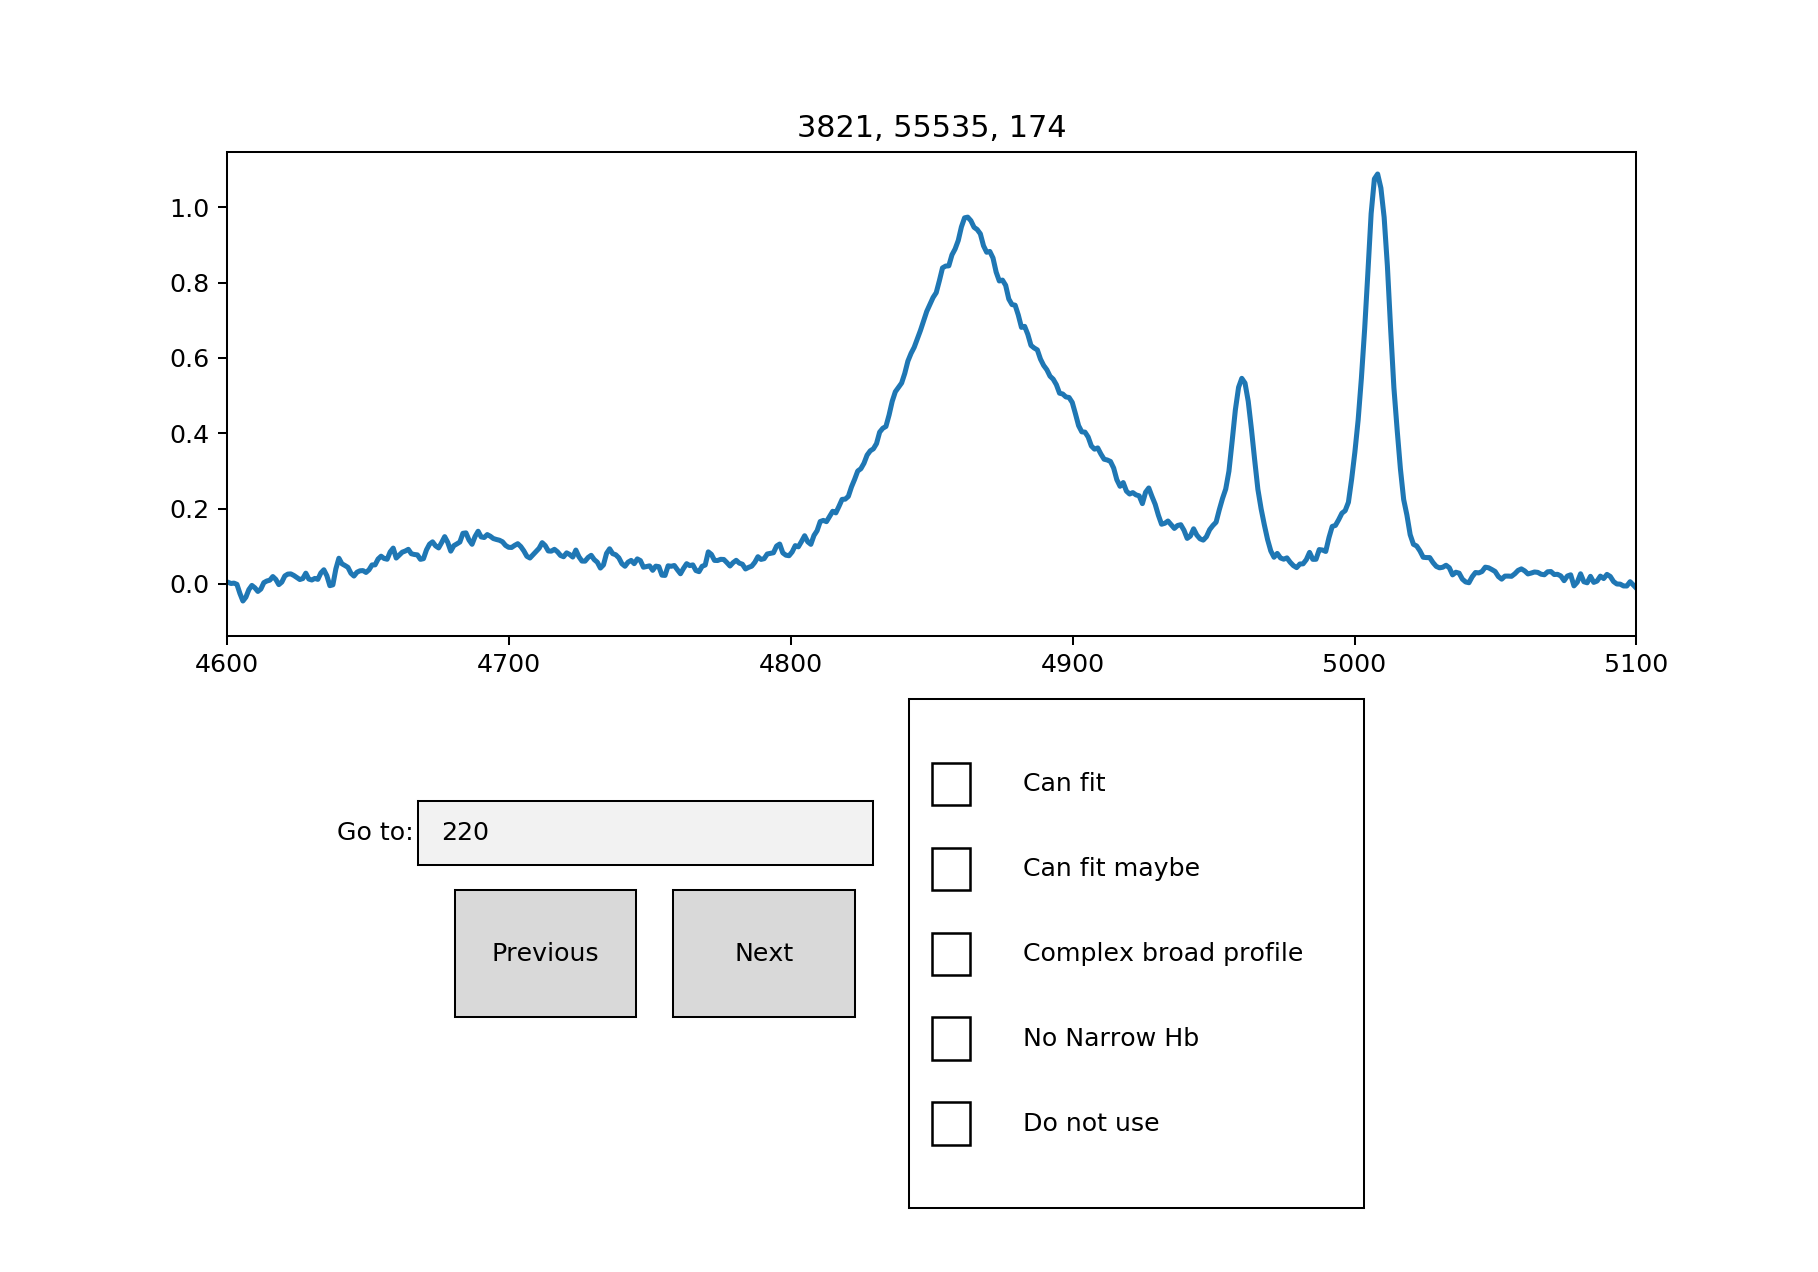

In [3]:
gui = inspec.inspec(path_specs, path_wave, path_spiders_fits)

# Notes:
-  the spectrum is in log scale - numpy.log( 1 + flux )
-  flux = (original flux - continuum - fe)/median(original flux)
- the sdss link is automatically copied to the clipboard